<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução ao Kaggle;</li>
  <li>Introdução ao problema de negócios;</li>
  <li>Exploração de dados.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

Escreva uma breve descrição do problema.

## 2\. Pacotes e bibliotecas

In [ ]:
# importe todas as suas bibliotecas aqui, siga os padrões do PEP8:
#
# - 1º pacotes nativos do python: json, os, etc.;
# - 2º pacotes de terceiros: pandas, seabornm etc.;
# - 3º pacotes que você desenvolveu.
#

...

In [3]:
!pip install geopandas
import os
import json
import pandas as pd
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import numpy
import geopandas as gpd
from shapely.geometry import Point

## 3\. Exploração de dados

In [ ]:
# faça o código de exploração de dados:
#
# - coleta de dados;
# - wrangling da estrutura;
# - exploração do schema;
# - etc.

In [1]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

In [4]:
with open('deliveries.json', mode='r', encoding='utf8',) as file:
  data = json.load(file)


In [ ]:
# trnsformando o dado json em tabelas com o pandas
deliveries_df = pd.DataFrame(data)

# fazendo o achatamento da coluna origin, separando cada dado da coluna origin e tranformando em uma nova coluna.
hub_origem_df = pd.json_normalize(deliveries_df['origin'])

# juntando ao dado original
deliveries_df = pd.merge(left=deliveries_df, right=hub_origem_df, how='inner',left_index=True, right_index=True)

#renomeando as colunas para uma melhor visualizaçao
deliveries_df.rename(columns={'lng':'hub_lng', 'lat':'hub_lat'}, inplace=True)

#tratando a coluna deliveries, criando uma coluna para cada tipo de dado
#usando explode transformar cade elemento em uma linha

deliveries_exploded_df = deliveries_df[['deliveries']].explode('deliveries')

#separando cada elemento em uma linha
deliveries_normalized_df = pd.concat([
    pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda record: record['size'])).rename(columns={'deliveries':'deliveries_size'}),
    pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"}),
], axis= 1)

#fazendo a uniao dos dois DF
deliveries_df = deliveries_df.drop("deliveries", axis=1)
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
deliveries_df.reset_index(inplace=True, drop=True)
deliveries_df.head()



In [16]:
len(deliveries_df)

636149

In [ ]:
#informacoes sobre o DataFrame
deliveries_df.info()

In [18]:
#visualizando as primeiras 5 linhas e as ultimas 5 linhas
deliveries_df.head(-5)


,name,region,origin,vehicle_capacity,hub_lng,hub_lat,deliveries_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,-48.054989,-15.838145,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,-48.054989,-15.838145,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,-48.054989,-15.838145,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,-48.054989,-15.838145,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,-48.054989,-15.838145,7,-48.114898,-15.858055
...,...,...,...,...,...,...,...,...,...
636139,cvrp-2-df-62,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,-48.054989,-15.838145,9,-48.066917,-15.994639
636140,cvrp-2-df-62,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,-48.054989,-15.838145,2,-48.060294,-16.001126
636141,cvrp-2-df-62,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,-48.054989,-15.838145,2,-48.061566,-16.006555
636142,cvrp-2-df-62,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,-48.054989,-15.838145,4,-48.060840,-16.005575


In [23]:
#minimas, medias, maximas e quartais
deliveries_df.drop(["name", "region"], axis=1).select_dtypes('int64').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vehicle_capacity,636149.0,180.000000,0.000000,180.0,180.0,180.0,180.0,180.0
deliveries_size,636149.0,5.512111,2.874557,1.0,3.0,6.0,8.0,10.0


In [ ]:
# vemos que a capacidade é de 180 para todas a linhas, nao ha nenhum desvio, porem vamos ver se essa capacidade é por hub ou por carro.

In [22]:
#deliveries_size por region, a soma area de ocupaçao de cada produto por region
soma_size_region = [
    deliveries_df[deliveries_df['region'] == 'df-0']['deliveries_size'].sum(),
    deliveries_df[deliveries_df['region'] == 'df-1']['deliveries_size'].sum(),
    deliveries_df[deliveries_df['region'] == 'df-2']['deliveries_size'].sum()]
print(soma_size_region)

#fazendo a soma do que ocupada cada produdo por hub, podemos perceber que a provavelmente a capacidade de 180 seja por veiculo.

[385932, 1681582, 1439010]


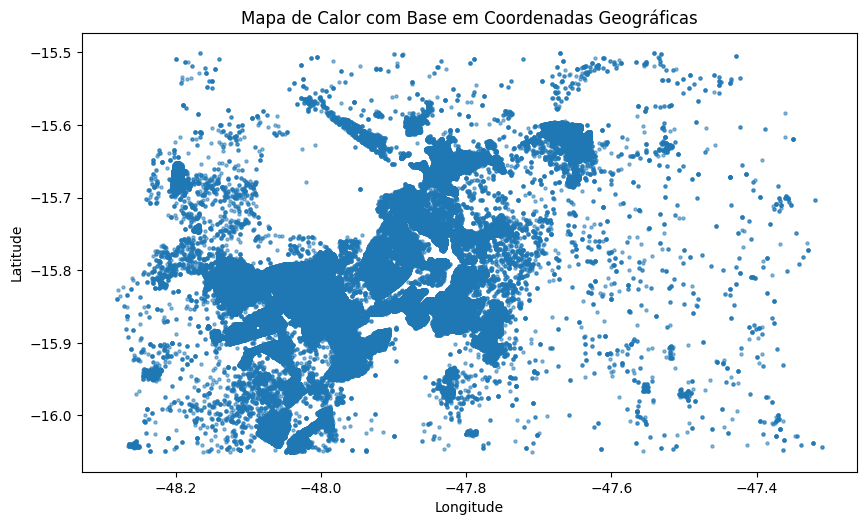

In [32]:
# Criando um grafico de calor usandos os dados geografico de cada entrega.
#pegando os dados da tabela
mapa_geo = [Point(xy) for xy in zip(deliveries_df['delivery_lng'], deliveries_df['delivery_lat'])]

# Criando um GeoDataFrame
gdf = gpd.GeoDataFrame(deliveries_df, geometry=mapa_geo)

# Plotar o mapa de calor
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, marker='o', markersize=5, alpha=0.5)

# Adicionar títulos e legendas
plt.title('Mapa de Calor com Base em Coordenadas Geográficas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Exibir o mapa
plt.show()


Com base nesse grafico podemos determinar as areas de maior concentraçao de entregas. Provavelmente sao areas do centro da cidade.
com base nesse grafico a empresa pode decidir ampliar os centros de distribuiçao nas zonas de alta demanda, ou até mesmo investir em um novo centro um caso nao tenha.

